---
title: Implementing Logistic Regression
author: Daniela Delgado
date: '2024-04-23'
image: "image.jpg"
description: "In this blog post, I implemented several <i>first-order methods</i>: optimization algorithms based on the gradients of functions. I implemented simple gradient descent, a momentum method, and stochastic gradient descent, comparing their performance for training logistic regression. 
objectives: 
  - Theory
  - Implementation
  - Experimentation"
format: html
---

Logistic Regression implementation logistic.py file: https://github.com/ddelgado8090/ddelgado8090.github.io/blob/main/posts/logistic_regression_optimization/logistic.py

# Abstract

In this blog post, I implement logistic regression from scratch. Then, through experiments such as Vanilla Gradient Descent, Gradient Descent with Momentum (also know as Spicy Gradient Descent), and Overfitting the model, I was able to test the implementation and see the different ways the loss over iterations as well as the accuracy changed at each experiment. In the Vanilla Gradient Descent experiment, I noticed the model did do what it was supposed to do, which was to show the loss decreasing monotonically to a low loss rate over a few thousand iterations. When I tested the Spicy Gradient Descent, the results were similar to the Vanilla Gradient Descent in terms of the graph showing the loss decreasing monotonically, except it reached a faster convergence, meaning it took less iterations to reach the loss rate that Vanilla Gradient Descent reached, and it achieved a smaller loss rate as it will be seen in the plotted graph where I compare the two gradient descent models. Finally, in experimenting with overfitting, I was able to see the importance of avoiding overfitting on the training data as achieving 100% accuracy on the training model through memorization does not mean the testing data will follow the same pattern. In this blog post, I took away how to implement Logistic Regression and the best ways to use and apply it.

In [150]:
%load_ext autoreload
%autoreload 2
from logistic import LogisticRegression , GradientDescentOptimizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Experiments

### Vanilla Gradient Descent

In this first experiment, I tested to see that when $p_dim = 2$, $\alpha$ is sufficiently small, and $\beta = 0$, then the gradient descent for logistic regression converges to a weight vector $\mathbf{w}$ that looks visually correct. I showed this by plotting the decision boundary with the data and graphing the plot the loss over iterations.

This code was provided by Phil in his assignment notes! This code creates classification data with noise.

In [151]:
import torch

def classification_data(n_points = 300, noise = 0.2, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    y = 1.0*y
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)
    
    return X, y

X, y = classification_data(noise = 0.5)


The code below was taken from Phil's class notes on perceptron. It was modified to adjust the target to be the y values of this data. 

This code creates the graph to show the classification_data through a graph. There are 300 points graphed where the x-axis (x_1) is a number you can measure and the y-axis (x_2) is another feature vector.

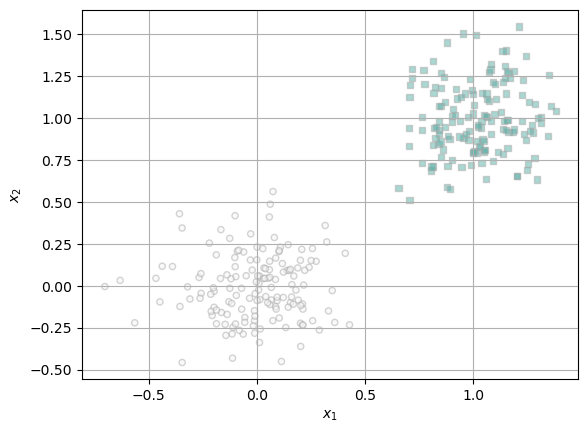

In [152]:
import matplotlib.pyplot as plt

def plot_classification_data(X, y, ax):
    assert X.shape[1] == 3, "This function only works for data created with p_dims == 2"
    targets = [0, 1]
    markers = ["o" , ","]
    for i in range(2):
        ix = y == targets[i]
        ax.scatter(X[ix,0], X[ix,1], s = 20,  c = y[ix], facecolors = "none", edgecolors = "darkgrey", cmap = "BrBG", vmin = -2, vmax = 2, alpha = 0.5, marker = markers[i])
    ax.set(xlabel = r"$x_1$", ylabel = r"$x_2$")

fig, ax = plt.subplots(1, 1)
X, y = classification_data()
plot_classification_data(X, y, ax)
plt.grid(True)


Now, to show the decision boundary, we draw the line by editing the code from the perceptron notes: 

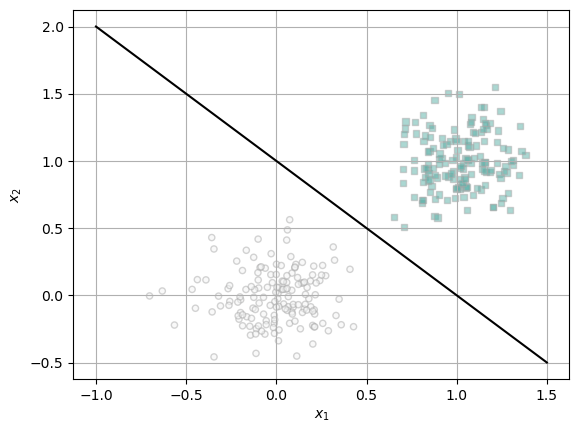

In [153]:
def draw_line(w, x_min, x_max, ax, **kwargs):
    w_ = w.flatten()
    x = torch.linspace(x_min, x_max, 101)
    y = -(w_[0]*x + w_[2])/w_[1]
    l = ax.plot(x, y, **kwargs)

fig, ax = plt.subplots(1, 1)
plot_classification_data(X, y, ax)

w_1 = torch.Tensor([1,  1, -1]) 

draw_line(w_1, x_min = -1, x_max = 1.5, ax = ax, color = "black")
plt.grid(True)


As we can see, the line exactly separates the two classes.

Next, I am plotting the loss over iterations, 5000 in my case, to show the loss decreasing monotonically. Part of the set-up code was provided in the assignment, but the code to keep track of the loss and the graph was created by me.

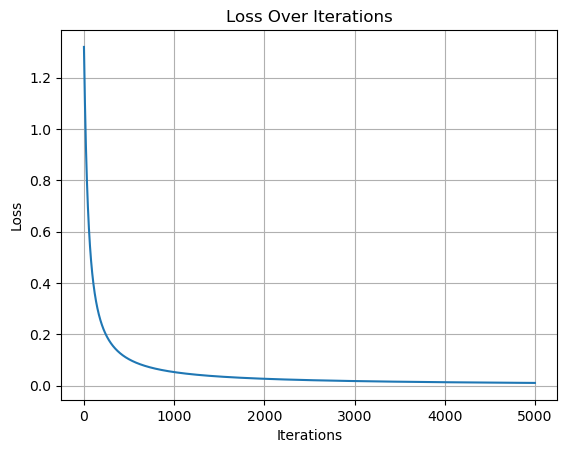

In [154]:
LR = LogisticRegression()
opt = GradientDescentOptimizer(LR)

total_loss = []
for _ in range(5000):
    # keeps track of the loss over time
    loss = LR.loss(X, y)
    total_loss.append(loss)
    opt.step(X, y, alpha = 0.1, beta = 0.0)

plt.plot(total_loss)
plt.grid(True)
plt.title("Loss Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")
#plt.text(0.2, 0.2, f'Total Loss: {loss:.3f}')
plt.show()

This graph shows the loss decreasing monotonically. It shows the loss over iterations when alpha is small and beta is 0.0, and as seen, it begins to flatten out consistently at bout 2,800 iterations.

### Benefits of Momentum

In this experiment, I used the same data that shows classification_data through a graph, but with momentum as the beta was increased to be 0.9.

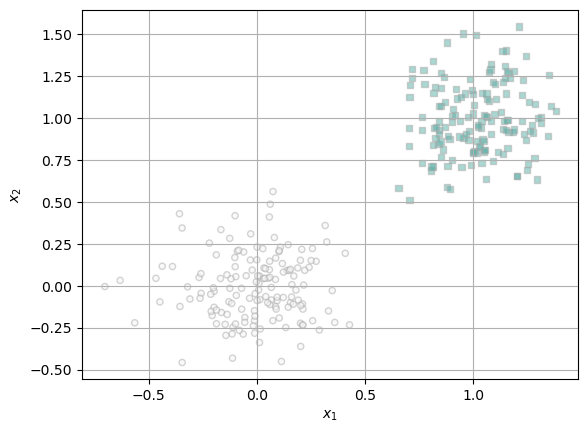

In [155]:
LR = LogisticRegression()
opt = GradientDescentOptimizer(LR)

total_loss_m = []
for _ in range(5000):
    # keeps track of the momentum loss over time
    loss = LR.loss(X, y)
    total_loss_m.append(loss)
    opt.step(X, y, alpha = 0.1, beta = 0.0)

fig, ax = plt.subplots(1, 1)
plot_classification_data(X, y, ax)
plt.grid(True)

To show the decision boundary, we draw the line by editing the code from the same perceptron notes where the line exactly separates the two classes:

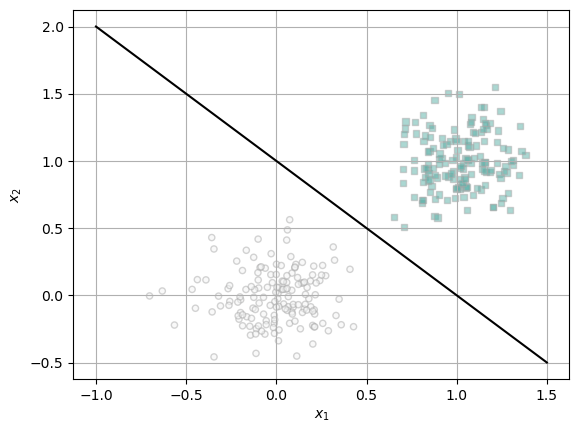

In [156]:
fig, ax = plt.subplots(1, 1)
plot_classification_data(X, y, ax)

w_1 = torch.Tensor([1,  1, -1]) 

draw_line(w_1, x_min = -1, x_max = 1.5, ax = ax, color = "black")
plt.grid(True)

Next, I am plotting the loss over iterations, 300 in this case as seen in the first code block of this experiment, to show the loss decreasing monotonically. Part of the set-up code was provided in the assignment, but the code to keep track of the loss and the graph was created by me.

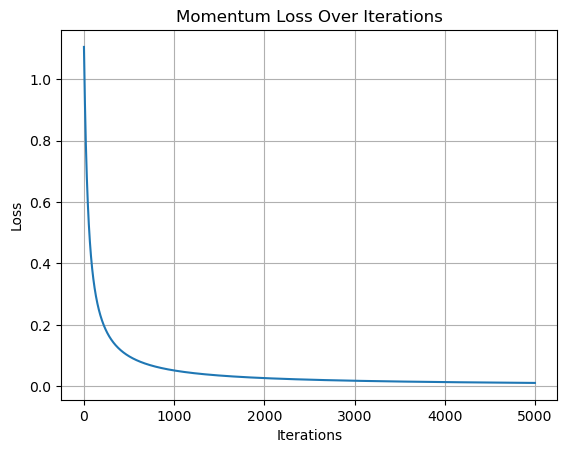

In [157]:
plt.plot(total_loss_m)
plt.grid(True)
plt.title("Momentum Loss Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")
#plt.text(0.2, 0.2, f'Total Loss: {loss:.4f}')
plt.show()

As seen, the loss over iterations reaches a consistent flattening at around 50 iterations. Much quicker than Vanilla Gradient Descent!

Next, I graphed the loss over iterations for each method, vanilla optimizer at a range of 6000 iterations while the momentum optimizer at 4000 iterations, to compare the two and see the speedup due to momentum:

In [163]:
LR = LogisticRegression()
opt = GradientDescentOptimizer(LR)

#vanilla
total_loss = []
for _ in range(6000):
    # keeping track of the loss over time
    loss = LR.loss(X, y)
    total_loss.append(loss)
    opt.step(X, y, alpha = 0.1, beta = 0.0)


#momentum
LR = LogisticRegression()
opt = GradientDescentOptimizer(LR)
total_m_loss = []
for _ in range(4000):
    # keeping track of the loss over time
    loss_m = LR.loss(X, y)
    total_m_loss.append(loss_m)
    
    opt.step(X, y, alpha = 0.2, beta = 0.9)

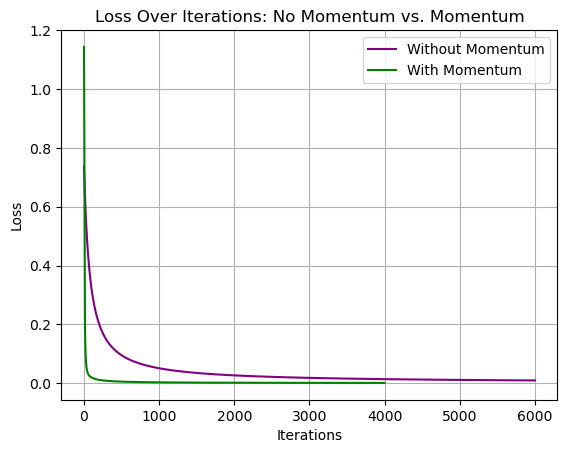

In [164]:
plt.plot(total_loss, label='Without Momentum', color = 'purple')
plt.plot(total_m_loss, label='With Momentum', color = 'green')
plt.grid(True)
plt.title("Loss Over Iterations: No Momentum vs. Momentum")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()

As seen, with momentum (the green line), a faster convergence is achieved. At 4000 iterations, it seems like the line with momentum was able to achieve a lower loss than the line without momentum (the purple line) as the green line is closer to the 0.0 loss value compared to the purple line that is above the green line. If the iterations were increased to 8000, we would see the purple line grow closer to the 0.0 loss like the green line is.

### Overfitting

In this experiment, I generate data where `p_dim > n_points` as seen with `n_points = 50` and `p_dims = 100`. I do this twice, first on the dataset  X_train, y_train and the second time on the dataset X_test, y_test. Then, I fit a logistic regression model to the data X_train, y_train where the goal was to obtain 100% accuracy on the training data, which is achieved as seen in the output.

In [160]:
X_train, y_train = classification_data(n_points = 50, noise = 0.6, p_dims = 100)


LR = LogisticRegression()
opt = GradientDescentOptimizer(LR)

losses = []
change = float('inf') #change in losses
loss = LR.loss(X_train, y_train)
losses.append(loss)
opt.step(X_train, y_train, alpha = 0.2, beta = 0.9)

while change > 10**(-6):
    #change is how much better it is getting

    #old loss is current loss
    new_loss = LR.loss(X_train, y_train)
    losses.append(new_loss)
    
    opt.step(X_train, y_train, alpha = 0.2, beta = 0.9)
    change = abs(new_loss - loss)
    loss = new_loss

#predicting 
pred_train = LR.predict(X_train)
pred_accuracy = torch.mean((pred_train == y_train).float())
print("Training predicting accuracy", float(pred_accuracy))


Training predicting accuracy 1.0


To show the change in loss during training, I graphed the loss over iterations with the values of the loss function at that iteration plotted. In the graph, we can see a decreasing trend, indicating that the model is improving its performance and converging towards an optimal solution.

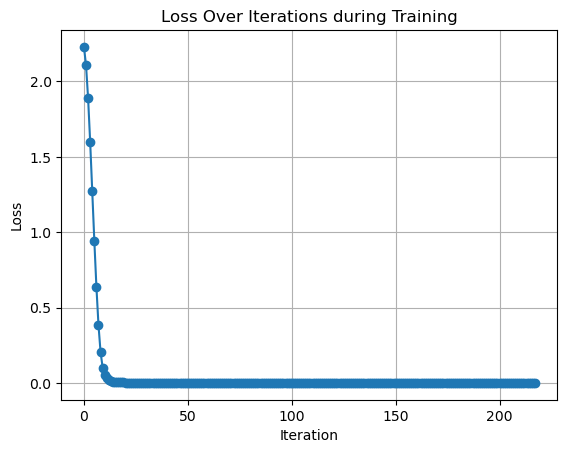

In [161]:
# Plotting change in losses during training
plt.plot(range(len(losses)), losses, marker='o', linestyle='-')
plt.title('Loss Over Iterations during Training')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)

plt.show()

Finally, I used the training model and ran it on the testing data where I got a lower accuracy rating. This shows the negative effects of overfitting a model on the training data.

In [162]:
X_test, y_test = classification_data(n_points = 50, noise = 0.6, p_dims = 100)

#predicting
pred_test = LR.predict(X_test)
pred_accuracy = torch.mean((pred_test == y_test).float())
print("Testing prediction accuracy", float(pred_accuracy))

Testing prediction accuracy 0.8799999952316284


# Conclusion

In this blog post, I implemented logistic regression and experimented with gradient descent optimizers, such as Vanilla and Spicy Gradient Descent optimizers, as well as seeing the consequences of overfitting data. For the optimizers, I found that while Vanilla Gradient Descent showed the plot we wanted to see, that is a plot decreasing monotonically, it did not reach a fast convergence compared to the gradient descent with momentum. The momentum also allowed the loss to be lower than the vanilla optimizer. That is, momentum outperformed the Vanilla Gradient Descent optimizer. In the overfitting experiment, I tested what would happen when the dimensions were greater than the number of points. As resulted, the model achieved 100% accuracy in the training data but a lower score on the testing data as it was memorizing the noise on the data with the high number of dimensions and a lower number of data points to use as examples rather than seeing the patterns. Through these experiments, I learned the importance of optimizers and what they mean and can do for the data. I also learned the importance of avoiding overfitting as the model becomes molded to the training data instead of figuring out patterns as before this blog post, I just knew it was "bad" but did not understand how it worked or the importance of cross validation. I believe I have a much better understanding of logistic regression and gradient descent optimizers in general after this blog post.